<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.708756,87.625148,-39.887323,154.446581,221.595704,-67.149122
1,0.0,1.0,56.577737,67.344946,62.104779,196.027463,145.199706,50.827757
2,0.0,2.0,65.069017,24.388738,-15.372503,84.085253,86.411389,-2.326135
3,0.0,3.0,73.437824,54.146192,61.037505,198.621521,142.840738,55.780784
4,0.0,4.0,79.258480,31.563873,-61.008423,59.813929,113.430491,-53.616562
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,79.146808,22.581609,21.756685,133.485102,118.461364,15.023739
59996,999.0,56.0,97.050414,89.770909,13.666846,210.488168,176.198635,34.289533
59997,999.0,57.0,35.748270,81.471664,-99.338993,27.880940,107.920841,-80.039900
59998,999.0,58.0,57.373357,29.141902,15.681656,112.196914,99.759067,12.437847


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.708756,87.625148,-39.887323,154.446581,221.595704,-67.149122
1,0.0,1.0,56.577737,67.344946,62.104779,196.027463,145.199706,50.827757
2,0.0,2.0,65.069017,24.388738,-15.372503,84.085253,86.411389,-2.326135
3,0.0,3.0,73.437824,54.146192,61.037505,198.621521,142.840738,55.780784
4,0.0,4.0,79.258480,31.563873,-61.008423,59.813929,113.430491,-53.616562
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,79.146808,22.581609,21.756685,133.485102,118.461364,15.023739
59996,999.0,56.0,97.050414,89.770909,13.666846,210.488168,176.198635,34.289533
59997,999.0,57.0,35.748270,81.471664,-99.338993,27.880940,107.920841,-80.039900
59998,999.0,58.0,57.373357,29.141902,15.681656,112.196914,99.759067,12.437847


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    96.708756  87.625148 -39.887323  154.446581  221.595704   
      1.0    56.577737  67.344946  62.104779  196.027463  145.199706   
      2.0    65.069017  24.388738 -15.372503   84.085253   86.411389   
      3.0    73.437824  54.146192  61.037505  198.621521  142.840738   
      4.0    79.258480  31.563873 -61.008423   59.813929  113.430491   
...                ...        ...        ...         ...         ...   
999.0 55.0   79.146808  22.581609  21.756685  133.485102  118.461364   
      56.0   97.050414  89.770909  13.666846  210.488168  176.198635   
      57.0   35.748270  81.471664 -99.338993   27.880940  107.920841   
      58.0   57.373357  29.141902  15.681656  112.196914   99.759067   
      59.0   84.057753  57.122827   7.626465  158.807045  143.700992   

                 e_hat  
rep   index             
0.0   0.0   -67.149122  
      1.0    50.827757  
      2.0    -2.326135  
      3.0    55.780784  
      4.0   -53.616562  
...                ...  
999.0 55.0   15.023739  
      56.0   34.289533  
      57.0  -80.039900  
      58.0   12.437847  
      59.0   15.106053  

[60000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    96.708756  87.625148 -39.887323  154.446581  221.595704   
      1.0    56.577737  67.344946  62.104779  196.027463  145.199706   
      2.0    65.069017  24.388738 -15.372503   84.085253   86.411389   
      3.0    73.437824  54.146192  61.037505  198.621521  142.840738   
      4.0    79.258480  31.563873 -61.008423   59.813929  113.430491   
...                ...        ...        ...         ...         ...   
999.0 55.0   79.146808  22.581609  21.756685  133.485102  118.461364   
      56.0   97.050414  89.770909  13.666846  210.488168  176.198635   
      57.0   35.748270  81.471664 -99.338993   27.880940  107.920841   
      58.0   57.373357  29.141902  15.681656  112.196914   99.759067   
      59.0   84.057753  57.122827   7.626465  158.807045  143.700992   

                 e_hat  
rep   index             
0.0   0.0   -67.149122  
      1.0    50.827757  
      2.0    -2.326135  
      3.0    55.780784  
      4.0   -53.616562  
...                ...  
999.0 55.0   15.023739  
      56.0   34.289533  
      57.0  -80.039900  
      58.0   12.437847  
      59.0   15.106053  

[60000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,96.708756,87.625148,-39.887323,154.446581,221.595704,-67.149122
1,0.0,1.0,56.577737,67.344946,62.104779,196.027463,145.199706,50.827757
2,0.0,2.0,65.069017,24.388738,-15.372503,84.085253,86.411389,-2.326135
3,0.0,3.0,73.437824,54.146192,61.037505,198.621521,142.840738,55.780784
4,0.0,4.0,79.258480,31.563873,-61.008423,59.813929,113.430491,-53.616562
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,79.146808,22.581609,21.756685,133.485102,118.461364,15.023739
59996,999.0,56.0,97.050414,89.770909,13.666846,210.488168,176.198635,34.289533
59997,999.0,57.0,35.748270,81.471664,-99.338993,27.880940,107.920841,-80.039900
59998,999.0,58.0,57.373357,29.141902,15.681656,112.196914,99.759067,12.437847


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    96.708756  87.625148 -39.887323  154.446581  221.595704   
      1.0    56.577737  67.344946  62.104779  196.027463  145.199706   
      2.0    65.069017  24.388738 -15.372503   84.085253   86.411389   
      3.0    73.437824  54.146192  61.037505  198.621521  142.840738   
      4.0    79.258480  31.563873 -61.008423   59.813929  113.430491   
...                ...        ...        ...         ...         ...   
999.0 55.0   79.146808  22.581609  21.756685  133.485102  118.461364   
      56.0   97.050414  89.770909  13.666846  210.488168  176.198635   
      57.0   35.748270  81.471664 -99.338993   27.880940  107.920841   
      58.0   57.373357  29.141902  15.681656  112.196914   99.759067   
      59.0   84.057753  57.122827   7.626465  158.807045  143.700992   

                 e_hat  
rep   index             
0.0   0.0   -67.149122  
      1.0    50.827757  
      2.0    -2.326135  
      3.0    55.780784  
      4.0   -53.616562  
...                ...  
999.0 55.0   15.023739  
      56.0   34.289533  
      57.0  -80.039900  
      58.0   12.437847  
      59.0   15.106053  

[60000 rows x 6 columns]

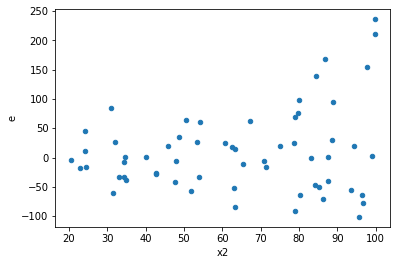

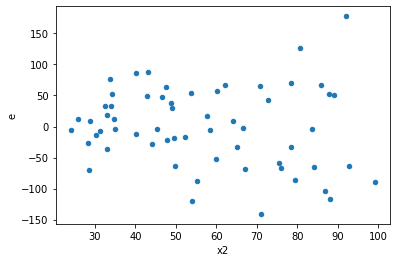

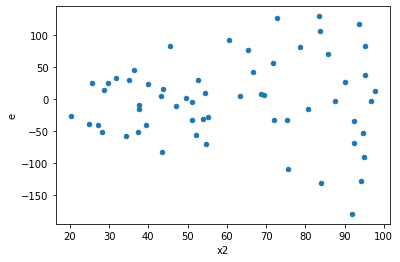

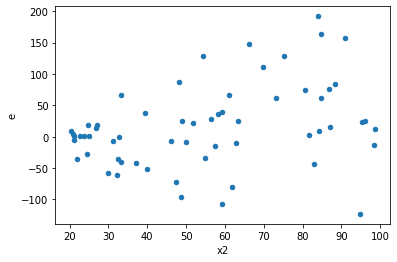

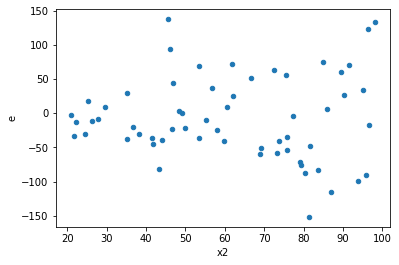

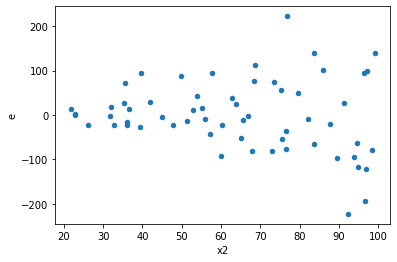

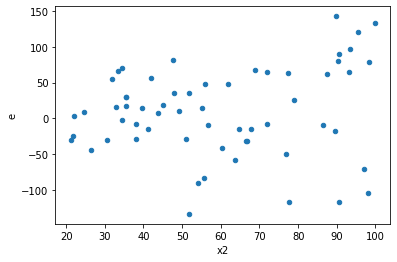

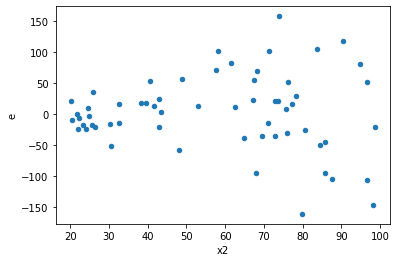

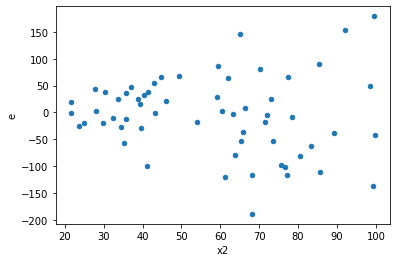

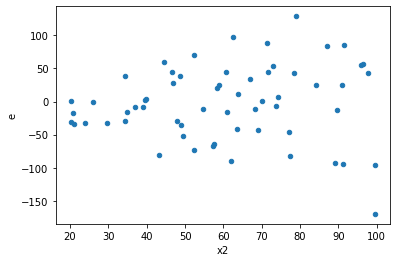

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,22.0,22.0,25048.76703578461,154803.43668299174,1138.5803198083913,7036.519849226897,6.180082095930707,6.933097702810365e-05,0.999965334511486,3.466548851405182e-05,Reject001=0 : Heteroscedasticity
1.0,22.0,22.0,27912.78843270739,152340.7654640382,1268.7631105776088,6924.580248365373,5.45774084274324,0.00018908607594170235,0.9999054569620291,9.454303797085117e-05,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,30404.32893270741,122568.08214921976,1382.0149514867005,5571.276461328171,4.03127075820336,0.0018357770665999862,0.9990821114667,0.0009178885332999931,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,27749.847301703026,156257.85527282732,1261.3566955319557,7102.629785128514,5.630944688594293,0.00014746888007621806,0.9999262655599619,7.373444003810903e-05,Reject001=0 : Heteroscedasticity
4.0,22.0,22.0,55843.60488980163,95128.4181406819,2538.345676809165,4324.019006394632,1.7034791777572835,0.2194416414912479,0.890279179254376,0.10972082074562395,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,60035.33614955959,168263.73569734377,2728.8789158890722,7648.351622606535,2.8027449580388186,0.0192676946275554,0.9903661526862223,0.0096338473137777,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,56493.05267286705,130571.80130056087,2567.866030584866,5935.081877298221,2.3112895324786185,0.05541439113144553,0.9722928044342772,0.027707195565722764,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,28982.35196159056,128590.4874801799,1317.3796346177528,5845.022158189996,4.436854802211946,0.0009198979024043208,0.9995400510487978,0.0004599489512021604,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,49746.38924367683,158901.03502376066,2261.1995110762196,7222.774319261848,3.194222484076234,0.008710067266306742,0.9956449663668466,0.004355033633153371,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,22.0,22.0,25048.76703578461,154803.43668299174,1138.5803198083913,7036.519849226897,6.180082095930707,6.933097702810365e-05,Reject001=0 : Heteroscedasticity
1.0,22.0,22.0,27912.78843270739,152340.7654640382,1268.7631105776088,6924.580248365373,5.45774084274324,0.00018908607594170235,Reject001=0 : Heteroscedasticity
2.0,22.0,22.0,30404.32893270741,122568.08214921976,1382.0149514867005,5571.276461328171,4.03127075820336,0.0018357770665999862,Reject001=0 : Heteroscedasticity
3.0,22.0,22.0,27749.847301703026,156257.85527282732,1261.3566955319557,7102.629785128514,5.630944688594293,0.00014746888007621806,Reject001=0 : Heteroscedasticity
4.0,22.0,22.0,55843.60488980163,95128.4181406819,2538.345676809165,4324.019006394632,1.7034791777572835,0.2194416414912479,Reject001=1 : Homoscedasticity
5.0,22.0,22.0,60035.33614955959,168263.73569734377,2728.8789158890722,7648.351622606535,2.8027449580388186,0.0192676946275554,Reject001=1 : Homoscedasticity
6.0,22.0,22.0,56493.05267286705,130571.80130056087,2567.866030584866,5935.081877298221,2.3112895324786185,0.05541439113144553,Reject001=1 : Homoscedasticity
7.0,22.0,22.0,28982.35196159056,128590.4874801799,1317.3796346177528,5845.022158189996,4.436854802211946,0.0009198979024043208,Reject001=0 : Heteroscedasticity
8.0,22.0,22.0,49746.38924367683,158901.03502376066,2261.1995110762196,7222.774319261848,3.194222484076234,0.008710067266306742,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      555
Reject001=0 : Heteroscedasticity    445
Name: Result_test, dtype: int64